In [235]:
import os
import matplotlib.pyplot as plt
from scipy.io import wavfile
import kapre
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda, Permute
from kapre.time_frequency import Melspectrogram, Spectrogram

plt.style.use('ggplot')

In [236]:
stft_model = Sequential()
stft_model.add(Spectrogram(n_dft=512, n_hop=160, input_shape=(1,5000),
                           return_decibel_spectrogram=True,
                           trainable_kernel=False, name='spectrogram'))

mel_model = Sequential()
mel_model.add(Melspectrogram(sr=5000, n_mels=128, 
              n_dft=512, n_hop=160, input_shape=(1,5000), 
              return_decibel_melgram=True,
              trainable_kernel=False, name='melspectrogram'))

c:\users\iljatscharikow\appdata\local\programs\python\python38\lib\site-packages\librosa\filters.py:194: FutureWarning: norm=1 behavior will change in librosa 0.8.0. To maintain forward compatibility, use norm='slaney' instead.
  warnings.warn('norm=1 behavior will change in librosa 0.8.0. '


In [252]:
def plot_signals_time(titles, signals):
    
    nrows, ncols = 1, 1
    fig, ax = plt.subplots(nrows, ncols, figsize=(16, 6))
    
    z = 0

    ax.set_title(titles[0])
    ax.plot(signals[0])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    z += 1
    
    plt.show()

In [253]:

def plot_spectrogram(titles, signals, title, shape=(16,8)):
    nrows, ncols = 1, 1
    fig, ax = plt.subplots(nrows, ncols, figsize=shape)
    fig.suptitle(title, size=20)
    plt.set_cmap('viridis')
    
    z = 0

    ax[0,0].set_title(titles[0])
    ax[0,0].imshow(signals[0].squeeze())
    ax[0,0].set_xticks([])
    ax[0,0].set_yticks([])
    ax[0,0].grid(False)
    z += 1
    
    plt.show()

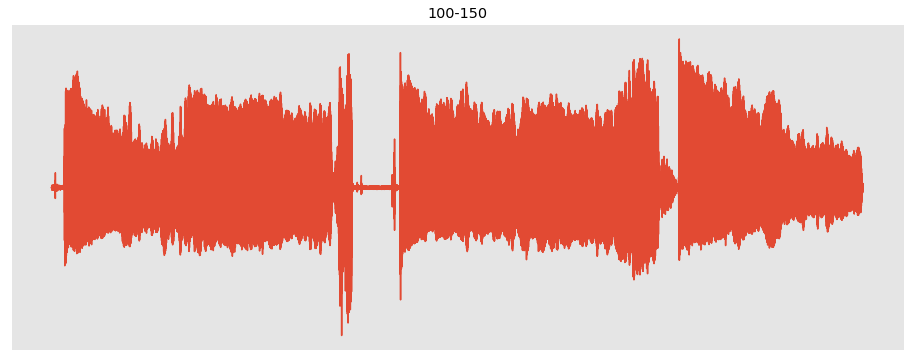

In [254]:
src_root = 'C:\\Users\\IljaTscharikow\\Desktop\\Uni\\Analyse von Sensordaten\\Audio-Classification-master\\wavfiles'

classes = os.listdir(src_root)
signals = []
titles = []
stft_specs = []
mel_specs = []

for _cls in sorted(classes):
    for fn in sorted(os.listdir(os.path.join(src_root, _cls))):
        rate, wav = wavfile.read(os.path.join(src_root, _cls, fn))
        signals.append(wav)
        titles.append(_cls)
        
        wav = wav.reshape(1, 1, -1)
        spec = stft_model.predict(wav)
        mel = mel_model.predict(wav)
        stft_specs.append(spec)
        mel_specs.append(mel)
        break

plot_signals_time(titles, signals)

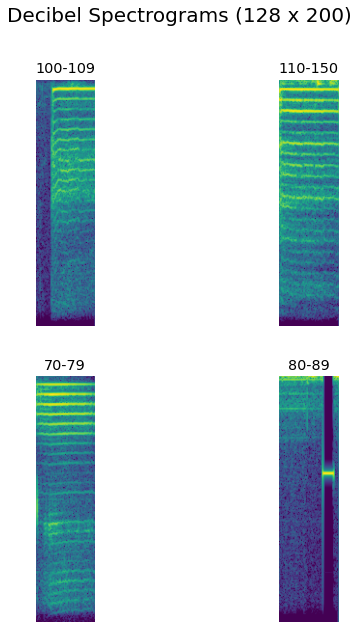

In [216]:
plot_spectrogram(titles, stft_specs, title= 'Decibel Spectrograms (128 x 200)',shape=(8,10))


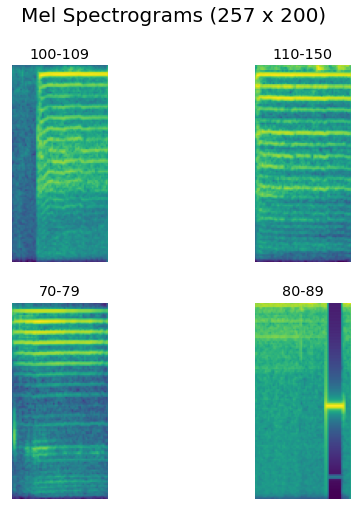

In [224]:
plot_spectrogram(titles, mel_specs, title='Mel Spectrograms (257 x 200)', shape= (8,8))

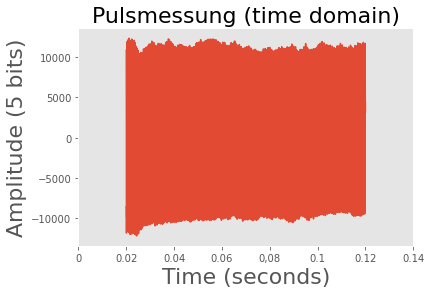

In [227]:
rate, wav = wavfile.read(os.path.join(src_root, '80-89', 'vowel 83_3.wav'))

plt.plot(wav)
plt.title('Pulsmessung (time domain)', size=22)
plt.grid(False)
locs, labels = plt.xticks()
plt.xticks(locs, ['0', '0.02', '0.04', '0.06', '0,08', '0.1', '0.12', '0.14', '0.16', '0.18', '0.2', '0.22', '0.24'])
plt.ylabel('Amplitude (5 bits)', size=22)
plt.xlabel('Time (seconds)', size=22)
plt.show()